# Import Library 

In [13]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
import shapefile as shp
%matplotlib inline

# Load Dataset 

In [2]:
df = pd.read_csv('dataset/flight.csv')
df.head(3)

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26


1. member_no : ID Member
2. ffp_date : Frequent Flyer Program Join Date
3. first_flight_date : Frist Flight Date 
4. gender : Gender
5. ffp_tier : Tier of Frequent Flyer Program
6. work_city : City 
7. work_province : Province
8. work_country : Country
9. age : Customer Age
10. load_time : The date data was retrieved
11. flight_count : Customer flight count
12. bp_sum : Flight plan 
13. sum_yr_1 : Fare revenue
14. sum_yr_2 : Votes prices
15. seg_km_sum : Total disctance (km) traveled 
16. last_flight_date : Last flight date 
17. last_to_end : Distance of the last flight to the last airline company 
18. avg_interval : Averange time distance
19. max_interval : Maximum time intervals 
20. exchange_count :Exchange amount 
21. avg_discount : Averange discount
22. points_sum : Customer point 
23. point_notflight : Not used customer point 

We have some categorical columns and also some numerical columns, our data cosisting of 3 rows and 23 columns 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

# Data Describing

## Missing data 

In [4]:
data_null = df.isnull().sum().reset_index()
data_null.columns = ['feature','missing_value']
data_null['percentage'] = round((data_null['missing_value']/len(df))*100,2)
data_null = data_null.sort_values('percentage', ascending=False).reset_index(drop=True)
data_null = data_null[data_null['percentage']>0]
data_null

,feature,missing_value,percentage
0,WORK_PROVINCE,3248,5.16
1,WORK_CITY,2269,3.60
2,SUM_YR_1,551,0.87
3,AGE,420,0.67
4,SUM_YR_2,138,0.22
5,WORK_COUNTRY,26,0.04


##### We will identify the chategory of missing value 

## Duplicated data 

In [5]:
df.duplicated().sum()

0

##### There is no duplicated data on dataset

## Features Data Type 

In [6]:
numericals = df.select_dtypes(exclude = 'object')
non_numericals = df.select_dtypes(include = 'object') 

print('There is ', numericals.shape[1], 'Numerical (float atau int)')
print('There is', non_numericals.shape[1], 'Categorical (str)')

There is  15 Numerical (float atau int)
There is 8 Categorical (str)


## Feature Engineering

In [7]:
#change datetime data type
df['FFP_DATE'] = pd.to_datetime(df['FFP_DATE'])
df['LOAD_TIME'] = pd.to_datetime(df['LOAD_TIME'])
df['FIRST_FLIGHT_DATE'] = pd.to_datetime(df['FIRST_FLIGHT_DATE'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   MEMBER_NO          62988 non-null  int64         
 1   FFP_DATE           62988 non-null  datetime64[ns]
 2   FIRST_FLIGHT_DATE  62988 non-null  datetime64[ns]
 3   GENDER             62985 non-null  object        
 4   FFP_TIER           62988 non-null  int64         
 5   WORK_CITY          60719 non-null  object        
 6   WORK_PROVINCE      59740 non-null  object        
 7   WORK_COUNTRY       62962 non-null  object        
 8   AGE                62568 non-null  float64       
 9   LOAD_TIME          62988 non-null  datetime64[ns]
 10  FLIGHT_COUNT       62988 non-null  int64         
 11  BP_SUM             62988 non-null  int64         
 12  SUM_YR_1           62437 non-null  float64       
 13  SUM_YR_2           62850 non-null  float64       
 14  SEG_KM

# EDA

## Statistical Summary

In [9]:
nums = df.select_dtypes(exclude = 'object')
cats = df.select_dtypes(include = 'object')
datetime = df.select_dtypes(include = 'datetime')

In [10]:
nums.describe()

,MEMBER_NO,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
count,62988.000000,62988.000000,62568.000000,62988.000000,62988.000000,62437.000000,62850.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.0000,62988.000000
mean,31494.500000,4.102162,42.476346,11.839414,10925.081254,5355.376064,5604.026014,17123.878691,176.120102,67.749788,166.033895,0.319775,0.721558,12545.7771,2.728155
std,18183.213715,0.373856,9.885915,14.049471,16339.486151,8109.450147,8703.364247,20960.844623,183.822223,77.517866,123.397180,1.136004,0.185427,20507.8167,7.364164
min,1.000000,4.000000,6.000000,2.000000,0.000000,0.000000,0.000000,368.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
25%,15747.750000,4.000000,35.000000,3.000000,2518.000000,1003.000000,780.000000,4747.000000,29.000000,23.370370,79.000000,0.000000,0.611997,2775.0000,0.000000
50%,31494.500000,4.000000,41.000000,7.000000,5700.000000,2800.000000,2773.000000,9994.000000,108.000000,44.666667,143.000000,0.000000,0.711856,6328.5000,0.000000
75%,47241.250000,4.000000,48.000000,15.000000,12831.000000,6574.000000,6845.750000,21271.250000,268.000000,82.000000,228.000000,0.000000,0.809476,14302.5000,1.000000
max,62988.000000,6.000000,110.000000,213.000000,505308.000000,239560.000000,234188.000000,580717.000000,731.000000,728.000000,728.000000,46.000000,1.500000,985572.0000,140.000000


1. There is some potential outliers in columns : AGE, Point_sum, Point_NotFlight 
2. Overall, the minimum and maximum values make sense for each columns 
3. Mean ~ Median in FFP_TIER, AGE, MEMBER_NO, SUM_YR_1, SUM_YR_2 idicating somewhat a symmetrical distribution, we will check again in univariate analysis

In [11]:
cats.describe()

,GENDER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,LAST_FLIGHT_DATE
count,62985,60719,59740,62962,62988
unique,2,3234,1165,118,731
top,Male,guangzhou,guangdong,CN,3/31/2014
freq,48134,9386,17509,57748,959


1. Gender have 2 unique value, and the top value is Male 
2. WORK_CITY columns have a various unique value, and the top value is guangzhou which also includes other data WORK_COUNTRY namely CN as the country of guangzhou

In [14]:
datetime.describe()

,FFP_DATE,FIRST_FLIGHT_DATE,LOAD_TIME
count,62988,62988,62988
unique,3068,3406,1
top,2011-01-13 00:00:00,2013-02-16 00:00:00,2014-03-31 00:00:00
freq,184,96,62988
first,2004-11-01 00:00:00,1905-12-31 00:00:00,2014-03-31 00:00:00
last,2013-03-31 00:00:00,2015-05-30 00:00:00,2014-03-31 00:00:00


1. Dataset contains data  from 2004 untuk 2013 
2. The last time date loaded ois in 2014 
3. FFP mostly done in 2013 

## Univariate Analysis 

### Data Distribution 

#### What gender is the most on data?

<AxesSubplot:>

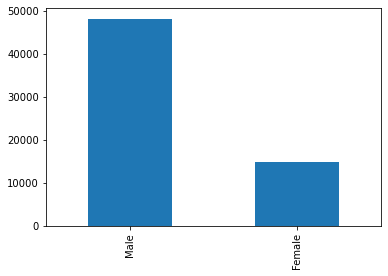

In [15]:
df['GENDER'].value_counts().plot(kind='bar')

##### Based on gender, most customers are male 

#### What is the average age of customers?

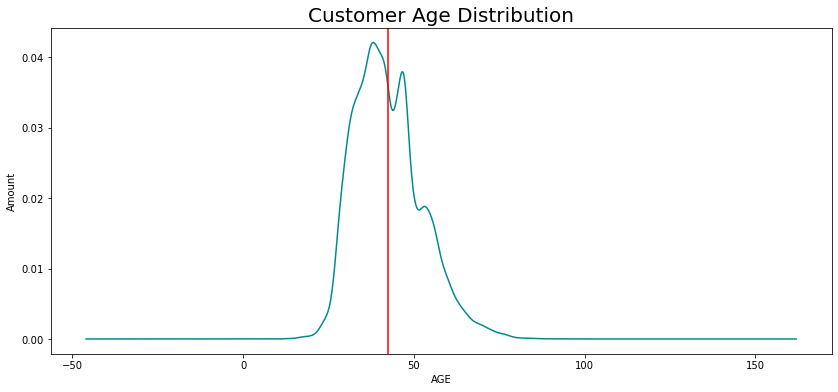

In [16]:
ax = df['AGE'].plot(kind='density',figsize=(14,6), color = 'darkcyan')
ax.axvline(df['AGE'].mean(),color='red')
plt.xlabel('AGE')
plt.ylabel('Amount')
plt.title('Customer Age Distribution',
          fontsize=20)

plt.show()

##### 1. There is outliers on Age features 
##### 2. The average age of customers is around 41 years old

#### Which country has the most customers?

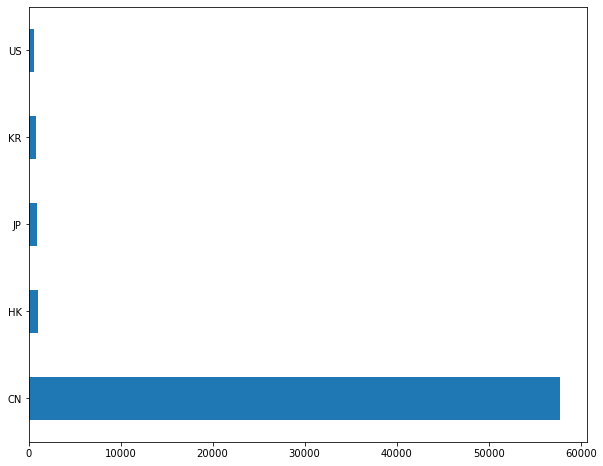

In [17]:
df['WORK_COUNTRY'].value_counts().head(5).plot(kind='barh',figsize=(10,8))
plt.show()

##### in the top 5 countries that use airlines services, CN is the number 1 airlines user followed by HK and JP  

#### Monetary

In [18]:
df['SEG_KM_SUM'].describe()

count     62988.000000
mean      17123.878691
std       20960.844623
min         368.000000
25%        4747.000000
50%        9994.000000
75%       21271.250000
max      580717.000000
Name: SEG_KM_SUM, dtype: float64

1. The total flight distance that has been carried out by customers is on average 17123.8 km
2. The shortest distance is 368 km 
3. The longest is 580717 km

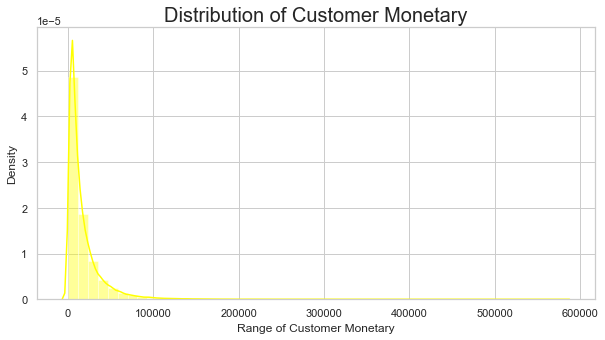

In [19]:
plt.figure(figsize=[10,5])
sns.set(style = 'whitegrid')
sns.distplot(df['SEG_KM_SUM'], color = "yellow")
plt.title('Distribution of Customer Monetary', fontsize = 20)
plt.xlabel('Range of Customer Monetary')
plt.show()

##### Data showen the mean value > the median so that the distribution becomes positively skew.

#### What is the amount of fare revenue? 

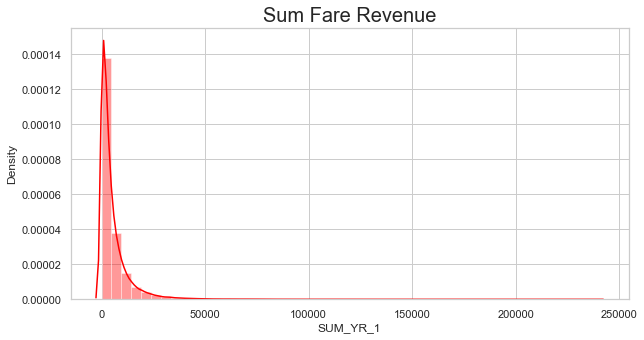

In [20]:
plt.figure(figsize=[10,5])
sns.set(style = 'whitegrid')
sns.distplot(df['SUM_YR_1'], color = "red")
plt.title('Sum Fare Revenue', fontsize = 20)
plt.show()

1. There is some outliers on dataset 
2. Data showen positively skewed data distribution
3. Fare revenue earned under 50000

#### How is the costemer flight distribution frequency ?

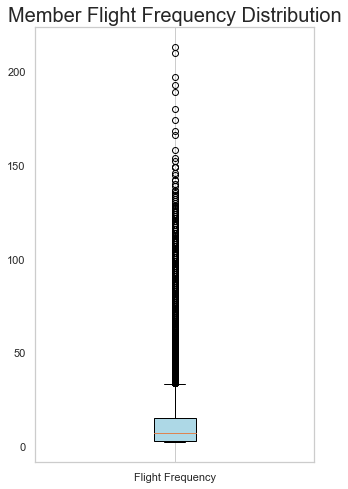

In [21]:
fig = plt.figure(figsize=(5,8))
plt.boxplot(df['FLIGHT_COUNT'], patch_artist=True, labels=['Flight Frequency'], boxprops={'facecolor': 'lightblue'})
plt.title('Member Flight Frequency Distribution',fontsize=20)
plt.grid(axis='y')
plt.show()

##### mamber with the most flights is more than 200 times

## Bivariate Analysis 

### Correlation 

<AxesSubplot:>

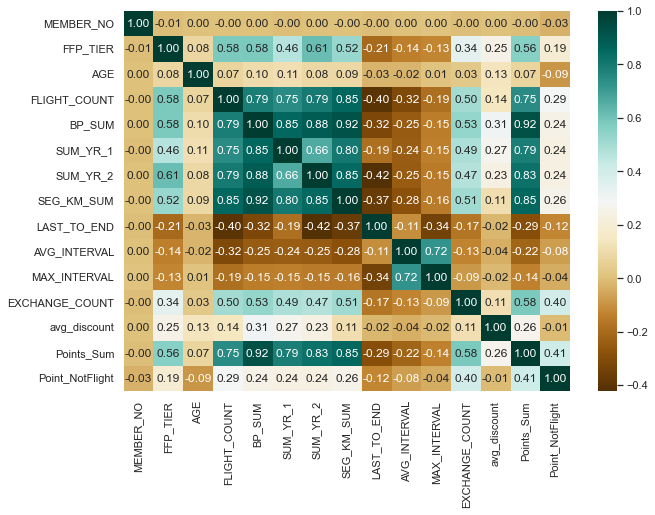

In [24]:
correlation = df.corr()
plt.figure(figsize = (10,7))
sns.heatmap(correlation, annot = True, fmt = '.2f', cmap = "BrBG")

BP_SUM and SEG_KM_SUM have a nigh correlation (0.92), while BP_SUM also have a high correlation with Points_Sum. 

### What is the most dominant gender in each tier? 

In [25]:
pd.crosstab(df.FFP_TIER, df.GENDER,margins=True)

GENDER,Female,Male,All
FFP_TIER,,,
4,14208,43856,58064
5,486,2923,3409
6,157,1355,1512
All,14851,48134,62985


Male 
1. Male in tier 4 is 43856 
2. Male in tier 5 is 2923
3. Male in tier 6 1355 

Famale 
1. Female in tier 4 is 14208 
2. Female in tier 5 is 486 
3. Female in tier 6 is 157

Comparing the amount of gender, it is true that male customer is more than female customer. In the distribution of every tier either in male or female customer mostly use tier 4 

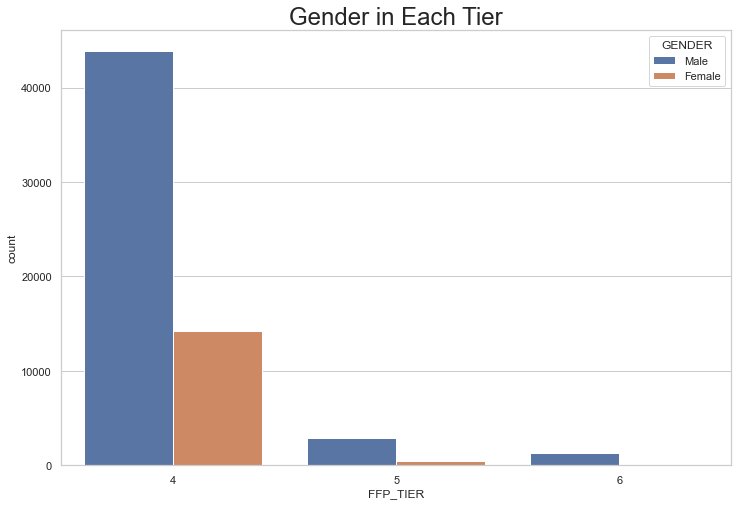

In [26]:
plt.figure(figsize=(12,8))

sns.countplot(df.FFP_TIER, hue=df.GENDER)
plt.title('Gender in Each Tier', size = 24)
plt.show()

### How many customers earn each year?

In [27]:
from datetime import datetime 
FFP_YEAR = df['FFP_DATE'].map(lambda x: x.year)

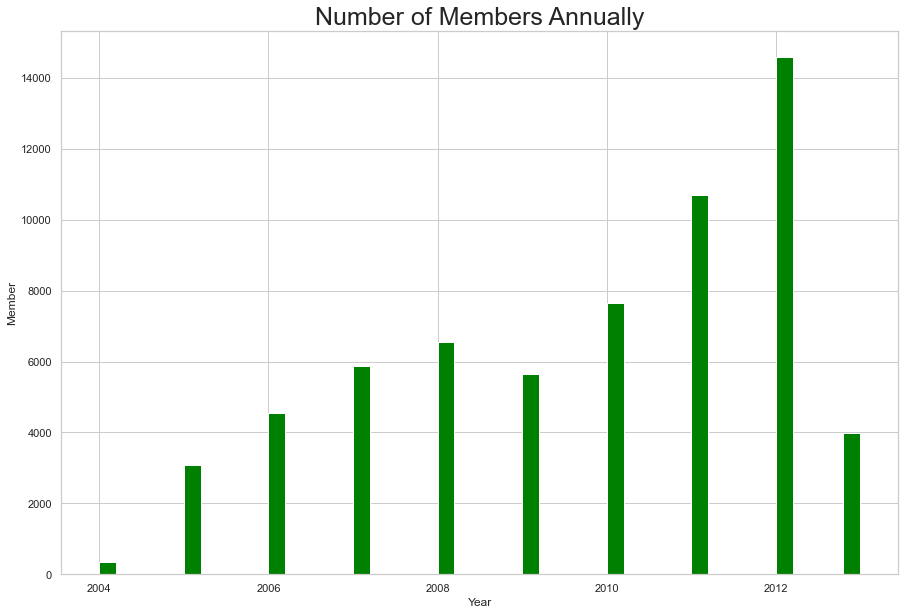

In [28]:
fig = plt.figure(figsize=(15, 10))

plt.hist(FFP_YEAR,bins='auto', color='green')
plt.xlabel('Year')
plt.ylabel('Member')
plt.title('Number of Members Annually', size = 25)
plt.show()

##### Broadly speaking, there is an increase in the number of members every year, with the largest gain in 2012 

# Data Preprocessing 

In [29]:
data = df.copy()

## Missing Value Handling 

The dataset contaion more than 5% missing value, we will handle the missing data based on types of missing data 

### Gender 

In [30]:
data[data['GENDER'].isnull()].reset_index()

,index,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,271,58411,2009-12-12,2010-04-15,NaN,6,MENAI,SYDNEY,AU,61.0,...,89477.0,105377,3/31/2014,1,43.000000,175,2,1.056396,159060,3
1,22471,55908,2012-10-14,2013-01-14,NaN,4,PARAMUS,NEW JERSEY,US,43.0,...,5670.0,8604,3/18/2014,14,61.285714,173,0,1.258319,12220,0
2,42565,4533,2011-01-25,2011-02-01,NaN,4,guangzhoushi,guangdong,CN,62.0,...,0.0,7845,2/26/2013,400,16.250000,31,0,0.521791,2982,0


In [31]:
data['GENDER'].fillna(data['GENDER'].mode()[0], inplace=True)

### Work City 

In [32]:
data[data['WORK_CITY'].isnull()].reset_index()

,index,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,1,28065,2007-02-19,2007-08-03,Male,6,NaN,beijing,CN,42.0,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
1,23,28474,2010-04-13,2010-04-13,Male,6,NaN,CA,US,41.0,...,59600.0,222380,1/18/2014,74,32.789474,110,8,1.004904,280760,9
2,24,58472,2010-02-14,2010-03-01,Female,5,NaN,NaN,FR,48.0,...,75816.0,281837,3/15/2014,17,15.883721,66,10,0.787308,235939,12
3,69,47919,2008-12-14,2010-05-20,Female,6,NaN,VIC,AU,43.0,...,91978.0,184194,3/25/2014,7,24.448276,92,3,0.928504,212047,3
4,104,30681,2010-05-26,2010-11-05,Male,6,NaN,NaN,JP,55.0,...,95788.0,150537,3/21/2014,11,14.914894,70,5,1.001145,220976,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2264,62950,31906,2011-03-09,2013-09-10,Male,4,NaN,NaN,TW,51.0,...,1260.0,368,9/15/2013,199,5.000000,5,0,0.835000,700,0
2265,62956,2213,2005-05-18,2005-07-19,Female,4,NaN,NaN,CN,45.0,...,422.0,904,1/19/2014,73,41.000000,41,0,0.320000,0,0
2266,62967,359,2012-04-12,2012-05-30,Male,4,NaN,guangdong,CN,34.0,...,0.0,1096,5/31/2012,671,1.000000,1,0,0.250000,0,0
2267,62970,38088,2005-03-11,2005-06-16,Female,4,NaN,NaN,CN,47.0,...,0.0,1096,10/11/2012,538,2.000000,2,0,0.250000,0,0


In [33]:
data['WORK_CITY'] = data['WORK_CITY'].fillna('other')

### Work Country 

In [34]:
data['WORK_COUNTRY'].unique()

array(['CN', 'US', 'FR', 'AN', 'JP', 'HK', 'MY', 'AU', 'NL', 'MX', 'CA',
       'KR', 'PK', 'TH', 'SG', 'BR', 'PE', 'AE', 'HN', 'PH', 'ID', 'MO',
       'GN', 'FL', 'KH', nan, 'TW', 'VN', 'DE', 'IL', 'CH', 'PA', 'VT',
       'EC', 'NG', 'BI', 'GT', 'BE', 'GL', 'NZ', 'FA', 'NI', 'KO', 'CC',
       'UV', 'MN', 'UK', 'AS', 'IT', 'OM', 'SE', 'BZ', 'IN', 'KZ', 'PT',
       'NO', 'MS', 'FI', 'UZ', 'NE', 'AT', 'AA', 'HU', 'CY', 'EG', 'MA',
       '中', 'ES', 'MZ', 'IR', 'SW', 'RE', 'PS', 'KE', 'SN', 'BB', 'AZ',
       'UA', 'LB', 'YE', 'GE', 'SI', 'KA', 'MV', 'RO', 'ZA', 'DK', 'AB',
       'CD', 'UY', 'CM', 'TK', 'AR', 'BN', 'PN', 'BD', '北', 'SU', 'RU',
       '沈', 'GU', 'GB', 'ZW', 'PP', '芬', 'FO', 'IE', 'PR', 'BS', 'GH',
       'SK', 'IA', 'cn', 'TR', 'LA', 'BG', 'CL', 'CR', 'SA'], dtype=object)

We will change some data tha contain Chinese characters 

In [35]:
data['WORK_COUNTRY'].replace({"中": "CN"}, inplace=True)

In [36]:
data['WORK_COUNTRY'].replace({"北": "CN"}, inplace=True)

In [37]:
data['WORK_COUNTRY'].replace({"沈": "CN"}, inplace=True)

In [38]:
data['WORK_COUNTRY'].replace({"芬": "FD"}, inplace=True)

In [39]:
data[data['WORK_COUNTRY'].isnull()]

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
2226,45041,2007-07-26,2007-11-14,Male,4,other,NaN,NaN,49.0,2014-03-31,...,13741.0,61442,3/13/2014,19,15.377778,95,1,0.817299,44113,1
4563,18124,2006-03-31,2011-07-24,Male,4,other,NaN,NaN,66.0,2014-03-31,...,31996.0,29440,3/28/2014,4,26.900000,188,0,1.218094,36630,0
8282,35987,2006-03-31,2006-08-04,Male,4,other,NaN,NaN,52.0,2014-03-31,...,11497.0,16952,7/7/2013,269,51.500000,200,0,1.473311,24843,1
13502,20244,2005-04-06,2005-06-17,Male,4,other,NaN,NaN,47.0,2014-03-31,...,672.0,18837,3/5/2014,27,63.363636,349,1,0.924350,30934,37
16058,20268,2005-04-23,2005-07-19,Male,4,other,NaN,NaN,49.0,2014-03-31,...,10850.0,24242,3/26/2014,6,40.166667,157,1,0.620168,9392,1
16615,14,2009-02-13,2009-10-20,Male,4,other,NaN,NaN,47.0,2014-03-31,...,0.0,10992,1/9/2013,448,23.083333,146,0,1.328539,13725,0
18385,27098,2006-08-20,2006-10-10,Male,4,other,NaN,NaN,NaN,2014-03-31,...,1380.0,16658,5/19/2013,318,18.227273,74,0,0.800600,12965,0
18715,29192,2005-04-10,2005-04-11,Male,4,other,NaN,NaN,46.0,2014-03-31,...,5383.0,24182,2014/2/29 0:00:00,32,40.687500,104,0,0.540859,10229,0
19774,1,2006-03-31,2007-01-13,Male,4,other,NaN,NaN,40.0,2014-03-31,...,7200.0,18770,9/16/2013,198,4.000000,7,0,0.658303,7035,0
22787,27081,2009-02-13,2009-08-08,Male,4,other,NaN,NaN,53.0,2014-03-31,...,2473.0,24137,2/20/2014,41,42.750000,144,0,0.441860,5101,1


In [40]:
#change Nan in index 49598 to NG
s = data['WORK_COUNTRY']
s.iloc[49598] = 'NG'

In [41]:
data[data['MEMBER_NO'] == 23207]

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
49598,23207,2010-12-22,2010-12-22,Male,4,ONITSHA,NIGERIA,NG,34.0,2014-03-31,...,1150.0,3527,10/8/2013,176,45.083333,150,0,0.799725,4979,0


We will fill the missing value on work contry with mode 

In [42]:
data['WORK_COUNTRY'].fillna(data['WORK_COUNTRY'].mode()[0], inplace=True)

### Work Province 

In [43]:
data[data['WORK_PROVINCE'].isnull()]

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
8,32197,2011-06-07,2011-07-01,Male,5,DRANCY,NaN,FR,50.0,2014-03-31,...,87401.0,321489,3/26/2014,6,13.054545,94,5,0.828478,295158,7
17,58899,2010-11-10,2011-02-23,Female,6,PARIS,NaN,FR,50.0,2014-03-31,...,63260.0,284160,2/16/2014,45,17.589744,77,12,0.837844,281705,13
24,58472,2010-02-14,2010-03-01,Female,5,other,NaN,FR,48.0,2014-03-31,...,75816.0,281837,3/15/2014,17,15.883721,66,10,0.787308,235939,12
34,28014,2006-12-01,2011-01-07,Female,6,Paris,NaN,FR,48.0,2014-03-31,...,69298.0,285144,3/29/2014,3,15.804348,105,5,0.725686,251712,7
45,58693,2010-12-11,2011-08-06,Male,6,PARIS,NaN,FR,39.0,2014-03-31,...,63000.0,185493,3/10/2014,22,34.900000,154,4,1.029508,237893,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62966,60676,2012-07-12,2013-02-08,Male,4,RIYADH,NaN,AA,37.0,2014-03-31,...,0.0,368,2/14/2013,412,6.000000,6,0,0.750000,400,0
62970,38088,2005-03-11,2005-06-16,Female,4,other,NaN,CN,47.0,2014-03-31,...,0.0,1096,10/11/2012,538,2.000000,2,0,0.250000,0,0
62974,11163,2005-05-08,2005-08-26,Male,4,other,NaN,CN,34.0,2014-03-31,...,960.0,368,1/3/2014,89,70.000000,70,0,0.710000,900,1
62975,30765,2008-11-16,2013-11-30,Male,4,TAIPEI,NaN,TW,38.0,2014-03-31,...,910.0,368,12/2/2013,121,2.000000,2,0,0.670000,400,0


In [44]:
data['WORK_PROVINCE'] = data['WORK_PROVINCE'].fillna('other')

### SUM_YR_1 and SUM_YR_2

We will drop data with missing value in sum_yr_1 and in sum_yr_2

In [45]:
data = data[data['SUM_YR_1'].notna()]

In [46]:
data = data[data['SUM_YR_2'].notna()]

### Age 

In [47]:
data['AGE'].isnull().sum()

415

In [48]:
data['AGE'].describe()

count    61884.000000
mean        42.494926
std          9.888297
min          6.000000
25%         35.000000
50%         41.000000
75%         48.000000
max        110.000000
Name: AGE, dtype: float64

In [49]:
med= data['AGE'].median()
med

41.0

In [50]:
data['AGE'] = data['AGE'].fillna(med)

In [51]:
data.isna().sum()

MEMBER_NO            0
FFP_DATE             0
FIRST_FLIGHT_DATE    0
GENDER               0
FFP_TIER             0
WORK_CITY            0
WORK_PROVINCE        0
WORK_COUNTRY         0
AGE                  0
LOAD_TIME            0
FLIGHT_COUNT         0
BP_SUM               0
SUM_YR_1             0
SUM_YR_2             0
SEG_KM_SUM           0
LAST_FLIGHT_DATE     0
LAST_TO_END          0
AVG_INTERVAL         0
MAX_INTERVAL         0
EXCHANGE_COUNT       0
avg_discount         0
Points_Sum           0
Point_NotFlight      0
dtype: int64

There is no more missing values on dataset 

## Selecting Columns 

In [52]:
U_data = data[['MEMBER_NO','LAST_TO_END','FLIGHT_COUNT','SEG_KM_SUM']]
U_data.head()

,MEMBER_NO,LAST_TO_END,FLIGHT_COUNT,SEG_KM_SUM
0,54993,1,210,580717
1,28065,7,140,293678
2,55106,11,135,283712
3,21189,97,23,281336
4,39546,5,152,309928


## Outliers Handling 

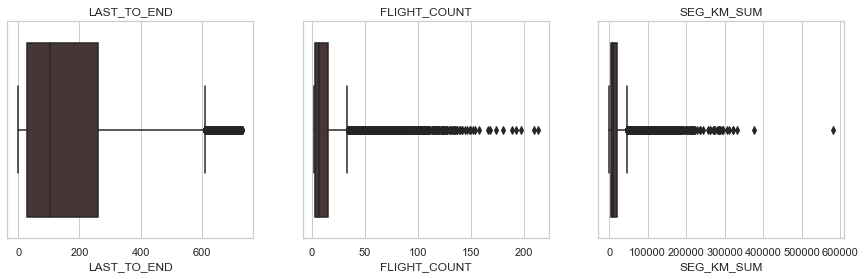

In [53]:
ANL=['LAST_TO_END','FLIGHT_COUNT','SEG_KM_SUM']
def dist_list(lst):
    plt.figure(figsize=[len(lst)*5,4])
    i = 1
    for col in lst:
        ax = plt.subplot(1,len(lst),i)
        sns.boxplot(U_data[col], color = '#483434')
        plt.title(col)
        i = i+1     
dist_list(ANL)

There is so many outliers on data we will use to modeling, we have to handle the data by deleting or reduce the outliers for some reason : 
1. The outlier greatly affects the mean and standard deviation of the dataset. 
2. This may statistically give incorrect results.
3. Outliers will increase the error variance and reduce the strength of statistical tests.

If the outliers are not randomly distributed, they can decrease normality.
Most Machine Learning algorithms do not work well when there are many outliers.

In [54]:
outlier = U_data.copy()

In [55]:
print(f'Rows before filtering outliers : {len(outlier)}')

filtered_entries = np.array([True] * len(outlier))
for col in ['LAST_TO_END','FLIGHT_COUNT','SEG_KM_SUM']:
    Q1 = outlier[col].quantile(0.25)
    Q3 = outlier[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((outlier[col] >= low_limit) & (outlier[col] <= high_limit)) & filtered_entries
    
df_handling = outlier[filtered_entries]

print(f'Rows after filtering outliers : {len(df_handling)}')

Rows before filtering outliers : 62299
Rows after filtering outliers : 54366


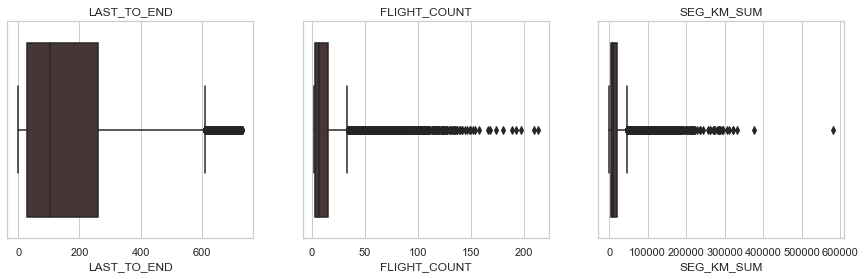

In [56]:
#Recheck outliers
dist_list(ANL)

There is still some outliers on dataset, but its been reduce

## Standard Scaling 

In [57]:
from sklearn.preprocessing import StandardScaler
df_std = df_handling.copy()
scale = StandardScaler()
kolom_all = [x for x in ['LAST_TO_END','FLIGHT_COUNT','SEG_KM_SUM']]
for kolom in kolom_all:
  df_std[kolom] = scale.fit_transform(np.array(df_std[kolom]).reshape(-1,1))
df_std.describe()

,MEMBER_NO,LAST_TO_END,FLIGHT_COUNT,SEG_KM_SUM
count,54366.000000,5.436600e+04,5.436600e+04,5.436600e+04
mean,31502.348821,-2.378503e-15,2.340757e-14,2.335195e-15
std,18176.328744,1.000009e+00,1.000009e+00,1.000009e+00
min,1.000000,-1.042134e+00,-9.658866e-01,-1.213653e+00
25%,15827.250000,-8.244570e-01,-8.241034e-01,-7.766996e-01
50%,31527.000000,-3.331287e-01,-3.987538e-01,-3.201364e-01
75%,47247.750000,5.500183e-01,4.519454e-01,5.165826e-01
max,62988.000000,2.739228e+00,3.429393e+00,3.397366e+00


# Clustering 

We will use K_Means clustering algorithm to divided data into some cluters

In [58]:
df_cluster = df_std[['LAST_TO_END','FLIGHT_COUNT','SEG_KM_SUM']] 

<AxesSubplot:>

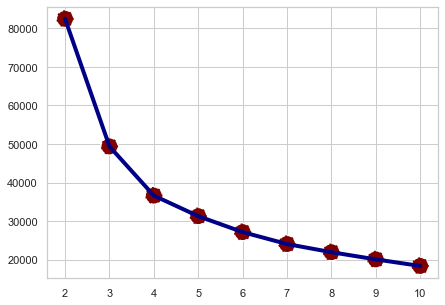

In [59]:
from sklearn.cluster import KMeans
inertia = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df_cluster.values)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(7,5))

sns.lineplot(x=range(2, 11), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2, 11), y=inertia, s=300, color='#800000',  linestyle='--')

since the elbows above look biased, we will use KElbowVisualizer to identify the value of K

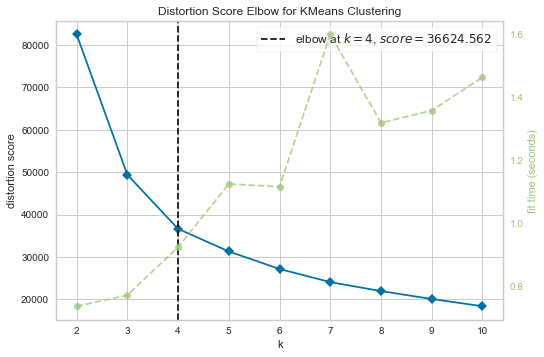

In [60]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from yellowbrick.cluster import KElbowVisualizer

Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(df_cluster)
Elbow_M.show()
plt.show()

## Model with 4 n clusters

In [61]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans = kmeans.fit(df_cluster.values)

In [62]:
# Inisiasi model K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=0)

kc = kmeans.fit(df_cluster.values)
cluster_labels = kc.labels_

data_cluster = df_cluster.assign(K_Cluster = cluster_labels)
data_label = df_handling.assign(K_Cluster = cluster_labels)

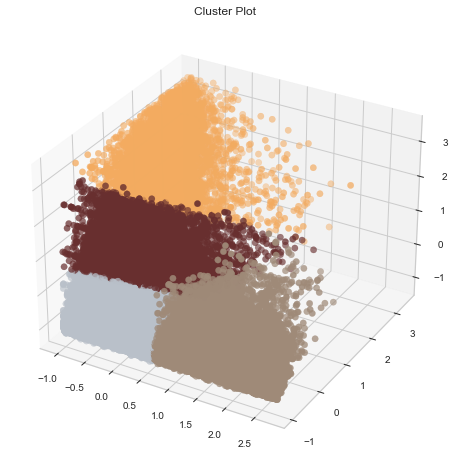

In [63]:
x = df_std["LAST_TO_END"]
y = df_std["FLIGHT_COUNT"]
z = df_std["SEG_KM_SUM"]
cmap = colors.ListedColormap(["#682F2F", "#B9C0C9", "#9F8A78", "#F3AB60"])

fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=data_cluster['K_Cluster'], marker='o', cmap = cmap)
ax.set_title("Cluster Plot")
plt.show()

## Model Analysis 

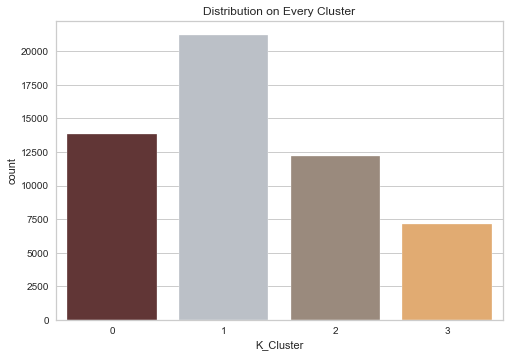

In [64]:
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"] 
pl = sns.countplot(x = data_cluster['K_Cluster'], palette= pal)
pl.set_title("Distribution on Every Cluster")
plt.show()

From the data displayed the most clusters are at cluster 1 followed by cluster 0 

### Plot Membership Time and Number of Flight Distance (km) 

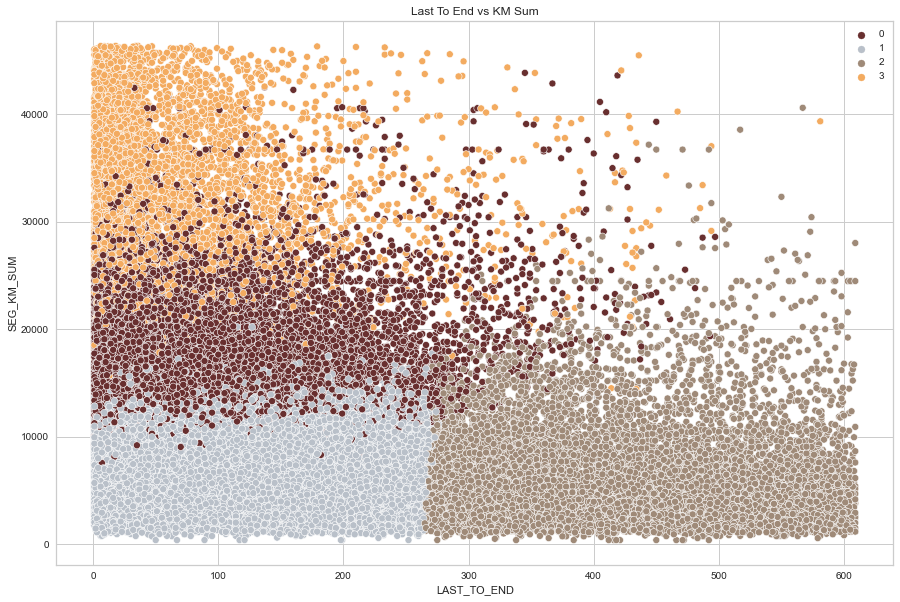

In [65]:
plt.figure(figsize= (15,10))
pl = sns.scatterplot(data = data_label, x = data_label["LAST_TO_END"], y = data_label['SEG_KM_SUM'], hue = data_label["K_Cluster"], palette= pal)
pl.set_title("Last To End vs KM Sum")
plt.legend()
plt.show()

- 0 : New customer with moderater flight distance 
- 1 : New customer with low flight distance 
- 2 : Old customer with low flight distance 
- 3 : New customer with high of flight distance 

### Plot Flight Count and Flight Distance (Km)

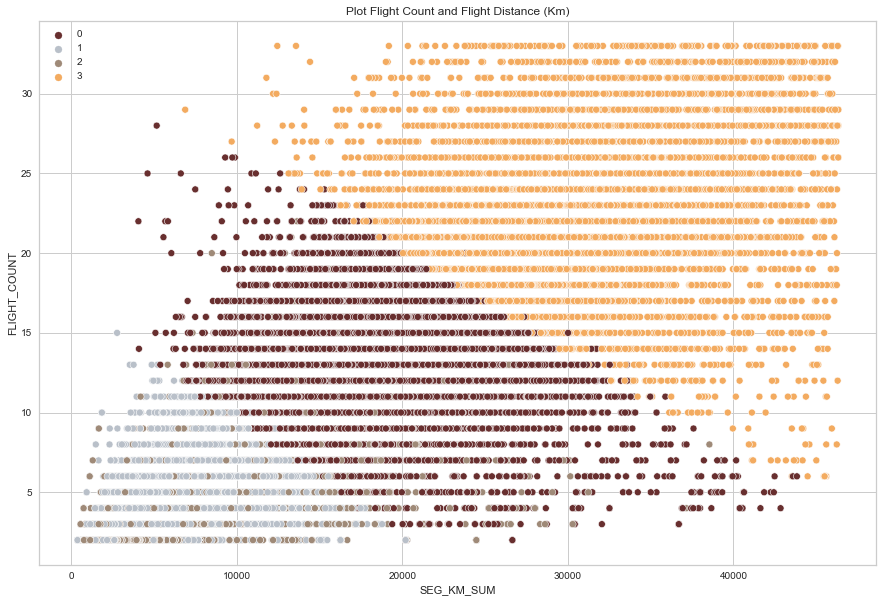

In [66]:
plt.figure(figsize= (15,10))
pl = sns.scatterplot(data = data_label, x = data_label['SEG_KM_SUM'], y = data_label['FLIGHT_COUNT'], hue = data_label["K_Cluster"], palette= pal)
pl.set_title("Plot Flight Count and Flight Distance (Km)")
plt.legend()
plt.show()

- 0 : Moderate flight distance with Moderate flight count 
- 1 : Low flight distance with low flight count 
- 2 : Low flight distance with low flight count 
- 3 : High flight distance with high flight count 

0 : New customer with moderater flight distance, Moderate flight count
1 : New customer with low flight distance, low flight count
2 : Old customer with low flight distance, low flight count
3 : New customer with high of flight distance, high flight count

# Profiling 

##### Platinum 

This profile is for cluster 3 with new membership, high fligh distance, and high flight count

##### Gold 

This profile is for cluster 0 with new membership, moderate flight distance, and moderate flight count 

##### Silver 

This profile is for cluster 1 with new membership, moderate flight distance, and moderate flight count 

##### Bronze

This profile is for cluster 2 with old membership, low flight distance, and low flight count 

# Business Recommendations 

##### Platinum 

Give customer more point benefits, voucher, or program such as to give a big discount when the customer reach some distance. We can use this group to trial on a new promotion. 

##### Gold 

This group is group the secound most praticipants. We have to build more brand awarness to this group. Such as give a free trials services in term of some condition.

##### Silver 

This group is the group with the most number of participants, that's why we have to more focus to this group. We have to give more offers such as cashback or point that make the customer have a feeling or a rush to use the offers again in the airlines.

##### Bronze 

This group we should maintain communication, and give a promotion that such as discount or holiday voucher to get the customers back to use Airlines 
